In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

speed = 1
x_min = 0.0
x_max = 4.5
t_max = (x_max - 1.5) / speed


def step_func(x, x0=0.5, eps=0.45):
    xi = np.abs((x - x0) / eps)
    return np.heaviside(1.0 - xi, 0.0)


def parabola(x, x0=0.5, eps=0.45):
    xi = np.abs((x - x0) / eps)
    return (1.0 - xi ** 2) * np.heaviside(1.0 - xi, 0.0)


def exp_func(x, x0=0.5, eps=0.45):
    xi = np.abs((x - x0) / eps)
    return np.exp(-xi ** 2 / (np.abs(1.0 - xi ** 2) + 1e-10)) * np.heaviside(1.0 - xi, 0.0)


def sin_func(x, x0=0.5, eps=0.45):
    xi = np.abs((x - x0) / eps)
    return np.cos(0.5 * np.pi * xi) ** 3 * np.heaviside(1.0 - xi, 0.0)

x0 = 0.5
t0 = 0.8
eps = 0.45

In [2]:
C = 0.5

h1 = 1e-2
t1 = C * h1 / speed
N1 = round(x_max / h1)
X1 = [0 + i * h1 for i in range(N1)]


h2 = 1e-3
t2 = C * h2 / speed
N2 = round(x_max / h2)
X2 = [0 + i * h2 for i in range(round(N2))]

In [3]:
from celluloid import Camera
frames = 100

def create_anim_square(phi, mu):
    u1 = np.array([phi(x) for x in X1])
    v1 = np.zeros(N1)
    u2 = np.array([phi(x) for x in X2])
    v2 = np.zeros(N2)

    errors1 = []
    errors2 = []
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.set_figwidth(17)
    fig.set_figheight(8)

    ax1.grid()
    ax2.grid()
    time1 = 0
    time2 = 0

    camera = Camera(fig)

    for i in range(1, frames):

        v1[0] = mu(time1 + t1)
        v2[0] = mu(time2 + t2)

        for j in range(1, N1):
            v1[j] = (-v1[j - 1] + u1[j - 1] + u1[j] - C * (u1[j] - v1[j - 1] - u1[j - 1])) / (1 + C)
        for j in range(1, N2):
            v2[j] = (-v2[j - 1] + u2[j - 1] + u2[j] - C * (u2[j] - v2[j - 1] - u2[j - 1])) / (1 + C)
        time1 += t1
        time2 += t2

        for _ in range(9):
            u2 = v2.copy()
            v2 = np.zeros(N2)
            v2[0] = mu(time2 + t2)
            for j in range(1, N2):
                v2[j] = (-v2[j - 1] + u2[j - 1] + u2[j] - C * (u2[j] - v2[j - 1] - u2[j - 1])) / (1 + C)
            time2 += t2

        if i % 2 == 0:
            ax1.annotate("Схема квадрат (С=0,5). t = {}".format(round(time1, 1)), (1.7, 1.07), annotation_clip=False)
            ax1.plot(X1, v1, color='blue')
            ax1.plot(X2, v2, color='red')

            true_func = [phi(x - speed * time1) for x in X1]

            ax1.plot(X1, true_func, color='orange')
            errors1.append((max(np.array([phi(x - speed * i * t1) for x in X1]) - v1)))
            errors2.append((max(np.array([phi(x - speed * 10 * i * t2) for x in X2]) - v2)))

            ax2.plot(errors1, color='green')
            ax2.plot(errors2, color='yellow')

            ax1.legend(['h=10e-2', 'h=10e-3', 'exact'])
            ax2.legend(['h=10e-2', 'h=10e-3'])

            camera.snap()

        u1 = v1.copy()
        v1 = np.zeros(N1)
        u2 = v2.copy()
        v2 = np.zeros(N2)

    print(str(phi.__name__), "e_0.01/e_0.001 = ", errors1[-1] / errors2[-1])
    anim = camera.animate()
    anim.save('square_' + str(phi.__name__) + '_mu.gif', writer='pillow', fps=30)

step_func e_0.01/e_0.001 =  0.9616129399633796
parabola e_0.01/e_0.001 =  4.616088587849024
exp_func e_0.01/e_0.001 =  64.40156915837433
sin_func e_0.01/e_0.001 =  99.70477181995595


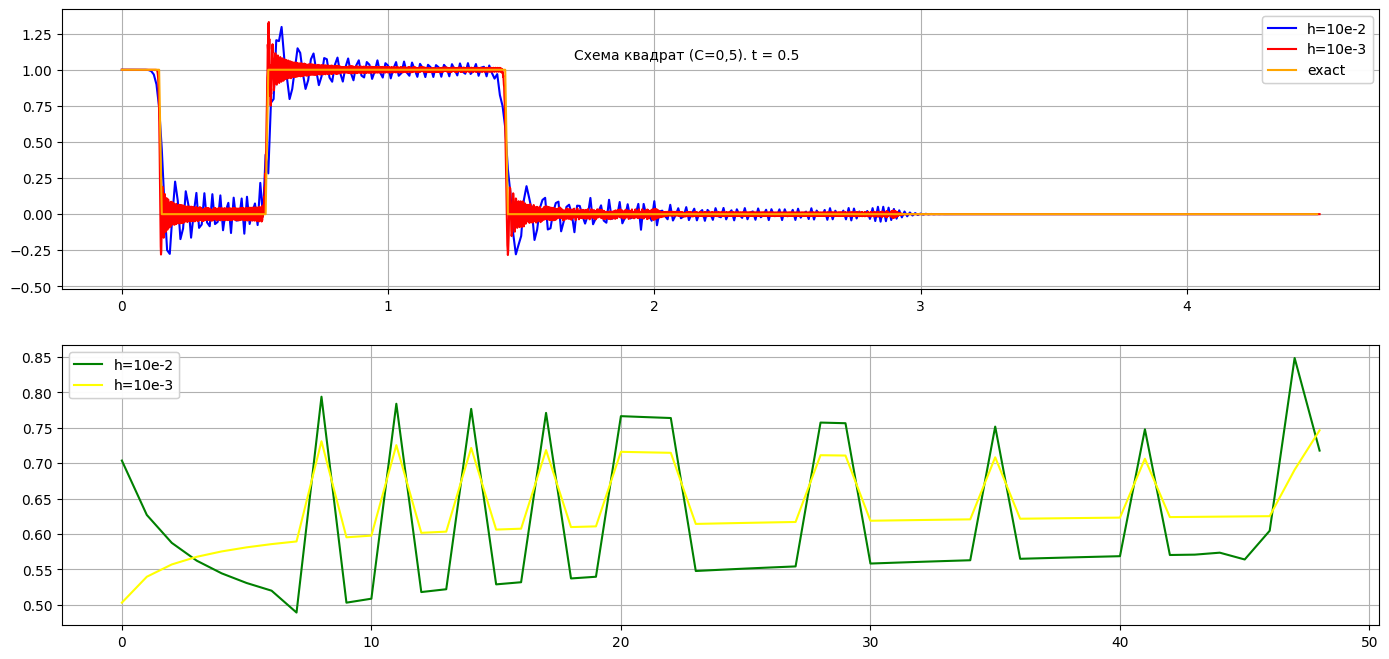

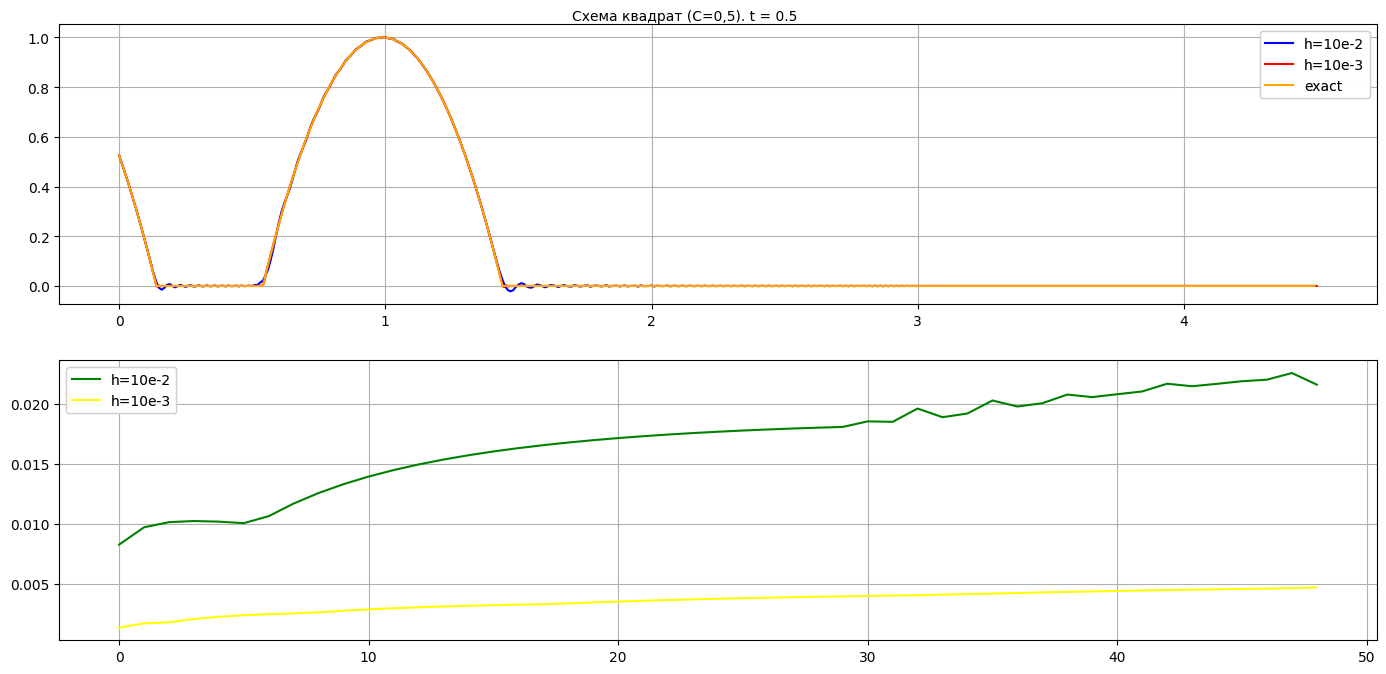

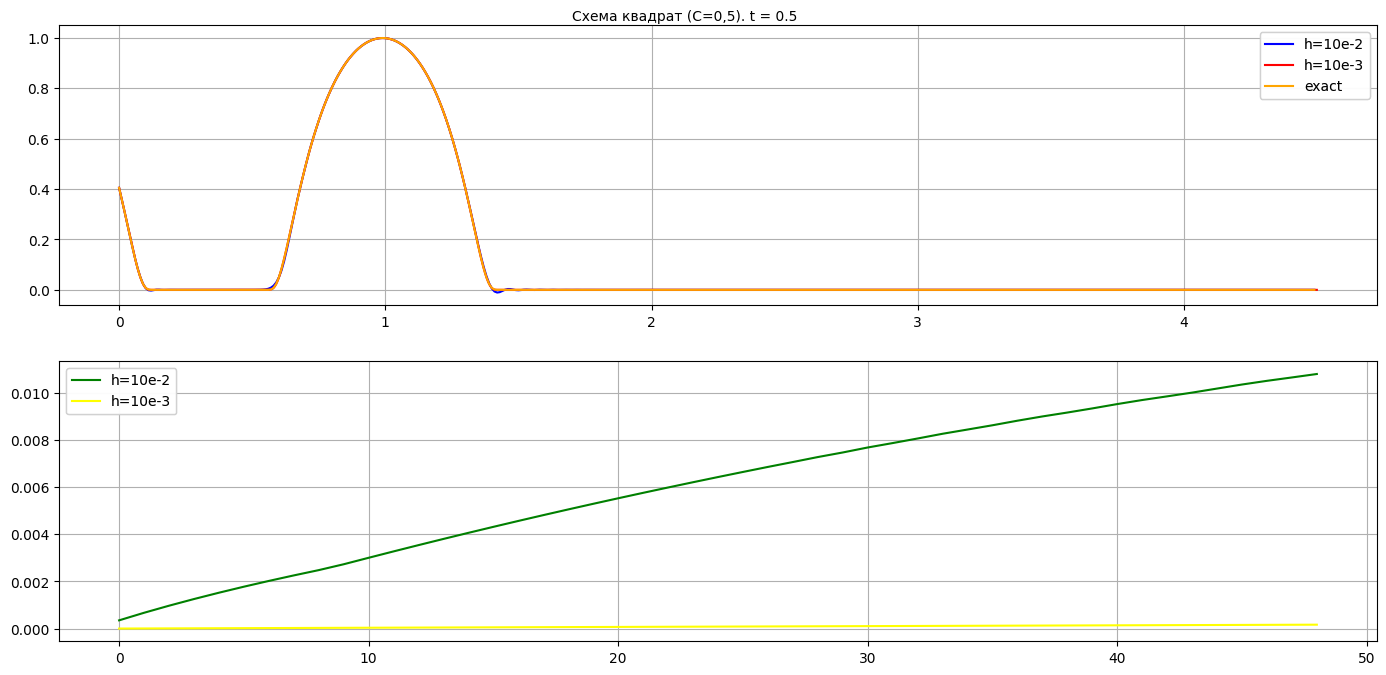

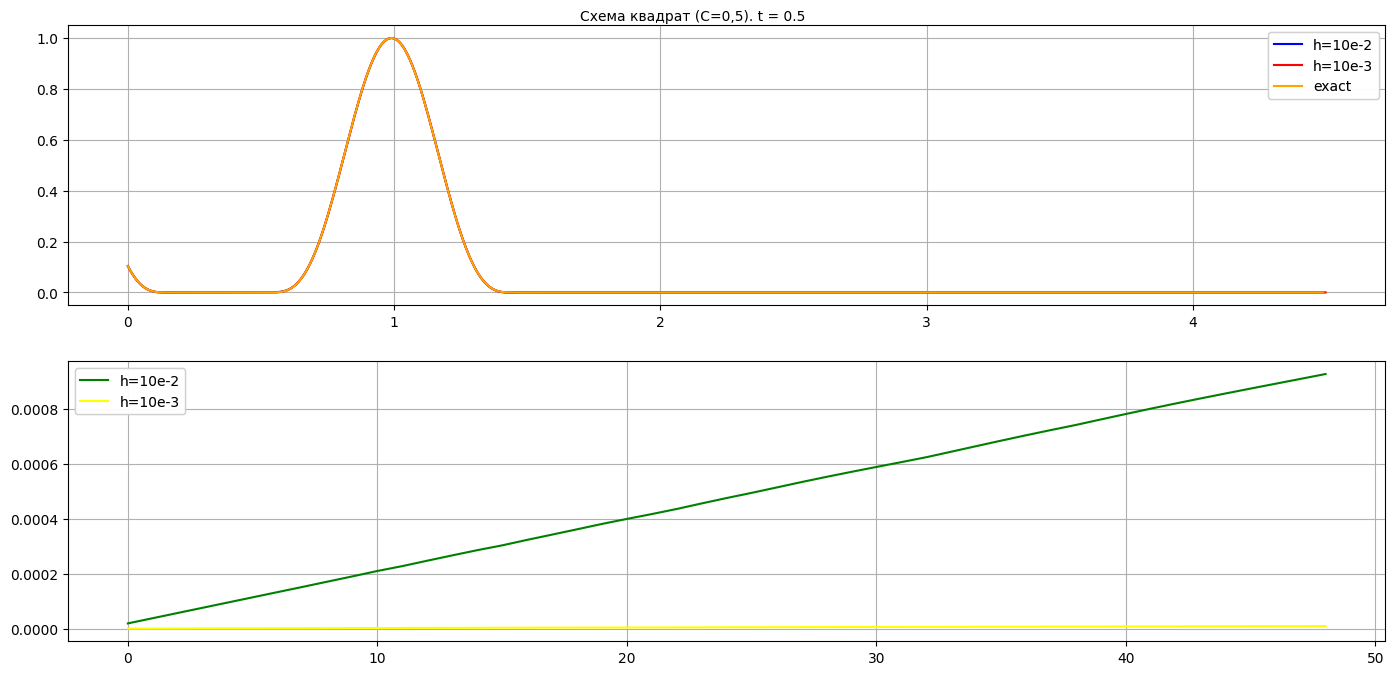

In [4]:
f = [step_func, parabola, exp_func, sin_func]
for func in f:
    mu = None
    if func.__name__ == 'step_func':
        mu = lambda t: step_func(t, x0=t0, eps=eps)
    elif func.__name__ == 'parabola':
        mu = lambda t: parabola(t, x0=t0, eps=eps)
    elif func.__name__ == 'exp_func':
        mu = lambda t: exp_func(t, x0=t0, eps=eps)
    elif func.__name__ == 'sin_func':
        mu = lambda t: sin_func(t, x0=t0, eps=eps)
    create_anim_square(func, mu)